In [1]:
%matplotlib inline

# 1 Baseline

Считываем данные, строим baseline модель и рассматриваем разные метрики и графики для задачи классификации.

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

plt.style.use('ggplot')

import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.24.2.


### 1.1 Данные

## Train

In [4]:
data_train = pd.read_csv('data_train_with_features.csv')
data_train.shape

(831653, 260)

In [5]:
data_train.head()

,Unnamed: 0,id,vas_id,buy_time,target,id_other,buy_time_other,0,1,2,...,243,244,245,246,247,248,249,250,251,252
0,0,2,2.0,1545598800,0.0,2,1545598800,-96.799971,229.530888,-110.740786,...,2300.626154,1492.229208,-21.996269,-35.630448,368.252276,11.167111,7.305572,-12.175933,-0.45614,0.0
1,1,4,1.0,1533502800,0.0,4,1538341200,-96.799971,-323.429112,-110.740786,...,4806.626154,4140.229208,-25.996269,-37.630448,-35.747724,-20.832889,-0.694428,-7.175933,-0.45614,0.0
2,2,15,1.0,1534107600,0.0,15,1531688400,260.810029,186.710888,249.409214,...,-381.373846,-613.770792,-24.996269,-31.630448,-212.747724,108.167111,-0.694428,107.824067,13.54386,1.0
3,3,16,2.0,1540760400,0.0,16,1548018000,152.050029,257.220888,195.609214,...,3185.626154,-613.770792,-21.996269,-37.630448,-139.747724,-24.832889,-0.694428,-12.175933,-0.45614,0.0
4,4,29,1.0,1533502800,0.0,29,1532898000,-52.309971,-230.219112,-36.590786,...,-847.373846,-509.770792,-25.996269,-37.630448,-233.747724,-10.832889,-0.694428,2.824067,-0.45614,0.0


In [6]:
data_train['mins'] = data_train["buy_time_other"] - data_train["buy_time_other"]
data_train.shape

(831653, 261)

In [7]:
data_train = data_train.loc[data_train['mins']>=0]

In [8]:
data_train.head()

,Unnamed: 0,id,vas_id,buy_time,target,id_other,buy_time_other,0,1,2,...,244,245,246,247,248,249,250,251,252,mins
0,0,2,2.0,1545598800,0.0,2,1545598800,-96.799971,229.530888,-110.740786,...,1492.229208,-21.996269,-35.630448,368.252276,11.167111,7.305572,-12.175933,-0.45614,0.0,0
1,1,4,1.0,1533502800,0.0,4,1538341200,-96.799971,-323.429112,-110.740786,...,4140.229208,-25.996269,-37.630448,-35.747724,-20.832889,-0.694428,-7.175933,-0.45614,0.0,0
2,2,15,1.0,1534107600,0.0,15,1531688400,260.810029,186.710888,249.409214,...,-613.770792,-24.996269,-31.630448,-212.747724,108.167111,-0.694428,107.824067,13.54386,1.0,0
3,3,16,2.0,1540760400,0.0,16,1548018000,152.050029,257.220888,195.609214,...,-613.770792,-21.996269,-37.630448,-139.747724,-24.832889,-0.694428,-12.175933,-0.45614,0.0,0
4,4,29,1.0,1533502800,0.0,29,1532898000,-52.309971,-230.219112,-36.590786,...,-509.770792,-25.996269,-37.630448,-233.747724,-10.832889,-0.694428,2.824067,-0.45614,0.0,0


In [9]:
data_train.shape

(831653, 261)

In [10]:
data_train = data_train.set_index('Unnamed: 0')

In [11]:
data_train = data_train.rename(columns={'Unnamed: 0':'index'})

In [12]:
data_train = data_train.drop(columns=['id_other','mins','buy_time_other'])

In [13]:
data_train.shape

(831653, 257)

In [14]:
data_train.head()

,id,vas_id,buy_time,target,0,1,2,3,4,5,...,243,244,245,246,247,248,249,250,251,252
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,2,2.0,1545598800,0.0,-96.799971,229.530888,-110.740786,305.723202,-116.158246,284.61821,...,2300.626154,1492.229208,-21.996269,-35.630448,368.252276,11.167111,7.305572,-12.175933,-0.45614,0.0
1,4,1.0,1533502800,0.0,-96.799971,-323.429112,-110.740786,-376.036798,-116.158246,-397.14179,...,4806.626154,4140.229208,-25.996269,-37.630448,-35.747724,-20.832889,-0.694428,-7.175933,-0.45614,0.0
2,15,1.0,1534107600,0.0,260.810029,186.710888,249.409214,140.873202,243.991754,119.76821,...,-381.373846,-613.770792,-24.996269,-31.630448,-212.747724,108.167111,-0.694428,107.824067,13.54386,1.0
3,16,2.0,1540760400,0.0,152.050029,257.220888,195.609214,267.113202,190.191754,246.00821,...,3185.626154,-613.770792,-21.996269,-37.630448,-139.747724,-24.832889,-0.694428,-12.175933,-0.45614,0.0
4,29,1.0,1533502800,0.0,-52.309971,-230.219112,-36.590786,-248.926798,-42.008246,-270.03179,...,-847.373846,-509.770792,-25.996269,-37.630448,-233.747724,-10.832889,-0.694428,2.824067,-0.45614,0.0


In [15]:
#Отбираем максимально близкое к таргету время покупки
#data_train = data_train.loc[
#    data_train.assign(mins=(data_train["buy_time_other"] - data_train["buy_time"]))
#    .groupby("id")["mins"]
#    .idxmax()
#]

## Test

In [16]:
data_test = pd.read_csv('data_test_with_features.csv')
data_test.shape

(71231, 259)

In [17]:
data_test.head()

,Unnamed: 0,id,vas_id,buy_time,id_other,buy_time_other,0,1,2,3,...,243,244,245,246,247,248,249,250,251,252
0,0,55,2.0,1547413200,54,1537131600,4.320029,-157.679112,-9.620786,-201.816798,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0
1,1,64,4.0,1548018000,63,1532293200,504.740029,1330.840888,519.619214,1388.833202,...,-943.373846,-613.770792,-25.996269,-26.630448,106.252276,-25.832889,-0.694428,-12.175933,-0.45614,0.0
2,2,151,2.0,1547413200,145,1547413200,-20.989971,-147.029112,-34.930786,-199.636798,...,-940.373846,-605.770792,-13.996269,-37.630448,-158.747724,109.167111,-0.694428,-12.175933,-0.45614,0.0
3,3,274,2.0,1547413200,265,1537736400,-52.279971,-26.709112,-66.220786,-79.316798,...,-879.373846,-554.770792,-21.996269,-37.630448,16.252276,-17.832889,-0.694428,-4.175933,-0.45614,1.0
4,4,274,4.0,1548018000,265,1537736400,-52.279971,-26.709112,-66.220786,-79.316798,...,-879.373846,-554.770792,-21.996269,-37.630448,16.252276,-17.832889,-0.694428,-4.175933,-0.45614,1.0


In [18]:
data_test = data_test.set_index('Unnamed: 0').rename(columns={'Unnamed: 0':'index'}).drop(columns=['id_other','buy_time_other'])

In [19]:
data_test.shape

(71231, 256)

In [20]:
# Разделим признаки и целевую переменную
data_prelim = data_train.copy()

X = data_prelim.drop('target', axis=1)
y = data_prelim['target']

In [21]:
print("ID уникален? ", X.index.is_unique)
print("Есть ли дубли в строках?", X.duplicated().sum())
print("Сколько процент признаков могут принимать null-значениями? %d%%" % float((X.isnull().sum() > 0).sum()/X.shape[1]*100))

ID уникален?  True
Есть ли дубли в строках? 0
Сколько процент признаков могут принимать null-значениями? 0%


**У признаков нет пропущенных значений**

### 1.2 Смотрим на train и test

0.0    0.927631
1.0    0.072369
Name: target, dtype: float64

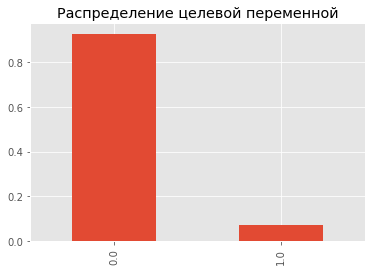

In [22]:
(y.value_counts()/y.shape[0]).plot(kind='bar', title='Распределение целевой переменной');
y.value_counts()/y.shape

In [23]:
from sklearn.model_selection import train_test_split

# Зафиксируем значение random_state для воспроизводимости результатов.
RANDOM_STATE = 888

train_idx, test_idx = train_test_split(X.index, test_size=0.25, random_state=RANDOM_STATE)

y_train, y_test = y.loc[train_idx], y.loc[test_idx]
X_train, X_test = X.loc[train_idx], X.loc[test_idx]

print("Train")
print(y.loc[train_idx].value_counts()/train_idx.shape[0])
print()
print("Test")
print(y.loc[test_idx].value_counts()/test_idx.shape[0])

Train
0.0    0.927652
1.0    0.072348
Name: target, dtype: float64

Test
0.0    0.927566
1.0    0.072434
Name: target, dtype: float64


### 1.3 Pipeline для baseline модели

Для построения baseline модели будем использовать логистическую регрессию.

In [24]:
from sklearn.linear_model import LogisticRegression

step_log_reg = ('log_reg', LogisticRegression(random_state=RANDOM_STATE, n_jobs=-1))

Базовый пайплайн будет состоять только из одного шага:
- Логистическая регрессия с базовыми параметрами

In [25]:
from sklearn.pipeline import Pipeline

bl_estimator = Pipeline([
    step_log_reg
])

### 1.4 Кросс-валидация

Для оценки качества модели будем использовать кросс-валидацию по 3-ем фолдам.

* Folds: 1 2 3
    * Train: 1,2 Val: 3
    * Train: 1,3 Val: 2
    * Train: 2,3 Val: 1

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

Варианты:
- ‘precision’, ‘recall’, ‘accuracy’, ‘f1’
- ‘average_precision’, ‘roc_auc’

In [26]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

kfold_cv = KFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)

def run_cv(estimator, cv, X, y, scoring='roc_auc', model_name=""):
    cv_res = cross_validate(estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    
    print("%s: %s = %0.2f (+/- %0.2f)" % (model_name,
                                         scoring,
                                         cv_res['test_score'].mean(),
                                         cv_res['test_score'].std() * 2))

Посмотрим на значение метрики на кросс-валидации, оно понадобится для сравнения с последующими моделями.

In [27]:
run_cv(bl_estimator, kfold_cv, X_train, y_train, model_name="Baseline");

Baseline: roc_auc = 0.57 (+/- 0.00)


### 1.5 Графики и метрики baseline модели на тесте

In [28]:
bl_estimator.fit(X_train, y_train)

bl_y_pred = bl_estimator.predict_proba(X_test)[:,1]

#### Распределение предсказаний baseline модели

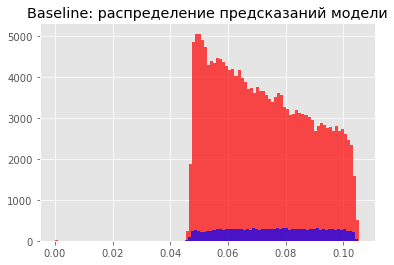

In [29]:
plt.title("Baseline: распределение предсказаний модели")
plt.hist(bl_y_pred[~y_test.astype(bool)], bins=100, color='r', alpha=0.7);
plt.hist(bl_y_pred[y_test.astype(bool)], bins=100, color='b', alpha=0.7);

#### Roc и PR Кривые

In [30]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

fpr, tpr, roc_thresholds = roc_curve(y_test, bl_y_pred)
precision, recall, pr_thresholds = precision_recall_curve(y_test, bl_y_pred)

Baseline: AUC_ROC = 0.562


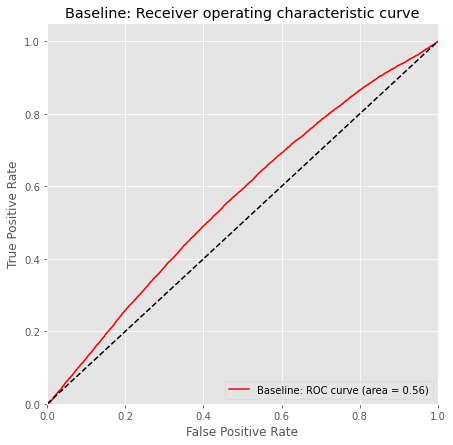

In [31]:
def plot_roc_curve(fpr, tpr, model_name="", color=None):
    plt.plot(fpr, tpr, label='%s: ROC curve (area = %0.2f)' %
             (model_name, auc(fpr, tpr)), color=color)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0.0, 1.0, 0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('%s: Receiver operating characteristic curve' % model_name)
    plt.legend(loc="lower right")

plt.figure(figsize=(7, 7))
plot_roc_curve(fpr, tpr, "Baseline", color='r')
print("Baseline: AUC_ROC = %.3f" % auc(fpr, tpr))

Baseline: AUC_PR = 0.084


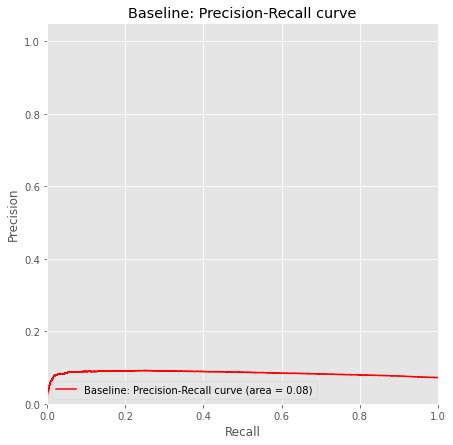

In [32]:
def plot_precision_recall_curve(recall, precision, model_name="", color=None):
    plt.plot(recall, precision, label='%s: Precision-Recall curve (area = %0.2f)' %
             (model_name, auc(recall, precision)), color=color)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title("%s: Precision-Recall curve" % model_name)
    plt.axis([0.0, 1.0, 0.0, 1.05])
    plt.legend(loc="lower left")

plt.figure(figsize=(7, 7))
    
plot_precision_recall_curve(recall, precision, "Baseline", color='r')
print("Baseline: AUC_PR = %.3f" % auc(recall, precision))

Максимальную точность при этом: 0.080
При каком пороге: 0.059


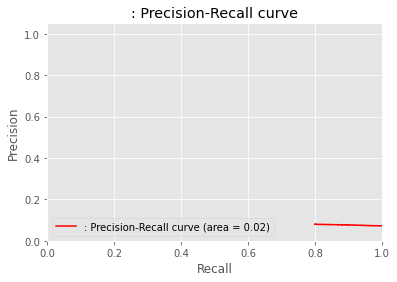

In [33]:
re80_mask = recall >= 0.8
pr_target_idx = np.arange(len(precision))[re80_mask]
pr_target = precision[re80_mask]

max_pr_idx = pr_target_idx[np.argmax(pr_target)]


print("Максимальную точность при этом: %.3f" % precision[max_pr_idx])
threshold80 = pr_thresholds[max_pr_idx]
print ("При каком пороге: %.3f" % threshold80)

plot_precision_recall_curve(recall[re80_mask], precision[re80_mask], color='r')

#### Матрица смежности

In [34]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          model_name="",
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest',  cmap=cmap)
    
    plt.grid(False)
    plt.title('%s: confusion matrix' % model_name)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[192854      0]
 [ 15060      0]]


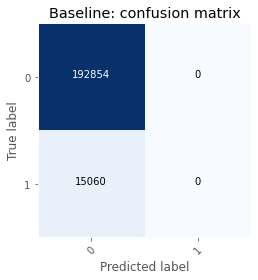

In [35]:
# TN                FP(Type II error)
# 
# FN(Type I error)  TP

cm = confusion_matrix(y_test, bl_y_pred > 0.5)
plot_confusion_matrix(cm, classes=["0", "1"], model_name="Baseline");

#### classification_report

In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_test, bl_y_pred > 0.5))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96    192854
         1.0       0.00      0.00      0.00     15060

    accuracy                           0.93    207914
   macro avg       0.46      0.50      0.48    207914
weighted avg       0.86      0.93      0.89    207914



In [37]:
tn, fp, fn, tp = cm.ravel()

precision = tp/(fp + tp)
recall = tp/(fn + tp)

accuracy = (tp + tn)/(fp + fn + tp + tn)

micro_avg_pr    = (tn + tp) / (fn + tn + fp + tp)
macro_avg_pr    = (tn/(fn + tn) + tp/(fp + tp))/2

n_0 = (y_test == 0).sum()
n_1 = (y_test == 1).sum()
weighted_avg_pr = (n_0*tn/(fn + tn) + n_1*tp/(fp + tp))/(n_0 + n_1)

print("              accuracy = %.2f"   % float(accuracy))
print("           1 precision = %.2f"   % float(precision))
print("              1 recall = %.2f"   % float(recall))
print("   micro avg precision = %.2f "  % float(micro_avg_pr))
print("   macro avg precision = %.2f "  % float(macro_avg_pr))
print("weighted avg precision = %.2f "  % float(weighted_avg_pr))

              accuracy = 0.93
           1 precision = nan
              1 recall = 0.00
   micro avg precision = 0.93 
   macro avg precision = nan 
weighted avg precision = nan 


# 2 Определение типа признаков

In [38]:
X_nunique = X.apply(lambda x: x.nunique(dropna=False))

In [39]:
X_nunique.shape

(256,)

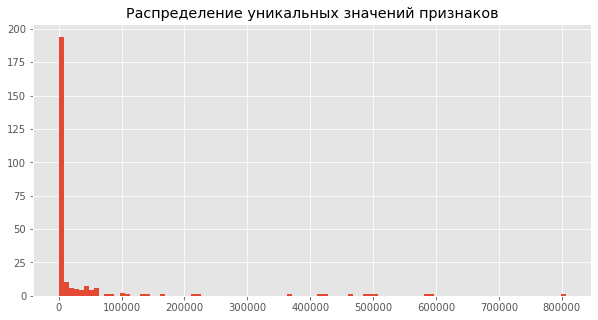

In [40]:
plt.title("Распределение уникальных значений признаков");
X_nunique.hist(bins=100, figsize=(10, 5));

In [41]:
f_all = set(X_nunique.index.tolist())
len(f_all)

256

#### константные признаки

In [42]:
f_const = set(X_nunique[X_nunique == 1].index.tolist())
len(f_const)

5

#### вещественные признаки

In [43]:
f_numeric = (X.fillna(0).astype(int).sum() - X.fillna(0).sum()).abs()
f_numeric = set(f_numeric[f_numeric > 0].index.tolist())
len(f_numeric)

247

In [44]:
f_other = f_all - (f_numeric | f_const)
len(f_other)

4

#### бинарные

In [45]:
f_binary = set(X.loc[:, f_other].columns[(
                      (X.loc[:, f_other].max() == 1) & \
                      (X.loc[:, f_other].min() == 0) & \
                      (X.loc[:, f_other].isnull().sum() == 0))])
len(f_binary)

0

In [46]:
f_other = f_other - f_binary
len(f_other)

4

#### категориальные

In [47]:
f_categorical = set(X_nunique.loc[f_other][X_nunique.loc[f_other] <= 10].index.tolist())
f_numeric_extra = f_categorical

In [48]:
f_other = f_other - f_categorical
len(f_other)

3

In [49]:
f_numeric = f_numeric | f_other

In [50]:
f_other = f_other - f_numeric
len(f_other)

0

In [51]:
assert(X_nunique.shape[0] == len(f_const) + len(f_binary) + len(f_numeric) + len(f_categorical))

In [52]:
print('f_all:', X.shape[1])
print()
print('f_const:', len(f_const))
print('f_binary:', len(f_binary))
print('f_categorical:', len(f_categorical))
print('f_numeric:', len(f_numeric))

f_ok = list(f_binary | f_categorical | f_numeric)
f_binary, f_categorical, f_numeric = list(f_binary), list(f_categorical), list(f_numeric)

f_all: 256

f_const: 5
f_binary: 0
f_categorical: 1
f_numeric: 250


# 3 sklearn.Pipeline

Pipeline-ы выполняют последовательность transformer-ов и могут завершаться финальным estimator-ом. Все объектов transformer-ы должны иметь два метода - fit и transform. Финальный Estimator должын иметь метод fit.

### 3.1 Column Selector

In [53]:
from sklearn.base import BaseEstimator, TransformerMixin

In [54]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        assert isinstance(X, pd.DataFrame)

        try:
            return X[self.columns]
        except KeyError:
            cols_error = list(set(self.columns) - set(X.columns))
            raise KeyError("DataFrame не содердит следующие колонки: %s" % cols_error)

In [55]:
cs_pipe= Pipeline([
    ('cs', ColumnSelector(columns=f_numeric+f_categorical)),
])

In [56]:
#cs_pipe.fit(X_train)

cs_pipe.transform(X_test).head()

,15,82,241,251,105,142,210,1,190,72,...,22,230,30,244,248,239,149,34,127,vas_id
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
581882,-0.000725,-0.248755,-106.617978,-0.45614,-0.040043,-0.042636,-30.716053,-174.939112,-0.163184,-2.60662,...,-0.094251,-39.772492,-0.211608,-613.770792,12.167111,213.590258,-0.007024,-2.65939,-0.020451,2.0
354454,-0.000725,-0.248755,-106.617978,-0.45614,-0.040043,-0.042636,-30.716053,285.030888,-0.163184,-2.60662,...,-0.094251,-39.772492,-0.211608,-613.770792,-25.832889,-108.409742,-0.007024,-2.65939,-0.060451,5.0
366075,-0.000725,-0.248755,-106.617978,-0.45614,-0.040043,-0.042636,-31.316053,-200.959112,-0.163184,-2.60662,...,-0.094251,-38.772492,-0.211608,-613.770792,-25.832889,-108.409742,-0.007024,-2.65939,-0.060451,1.0
323931,-0.000725,-0.248755,-106.617978,-0.45614,-0.040043,-0.042636,-42.882720,41.080888,-0.163184,-2.60662,...,-0.094251,-39.772492,-0.211608,-613.770792,-25.832889,-108.409742,-0.007024,-2.65939,-0.060451,2.0
625250,-0.000725,-0.248755,-94.617978,-0.45614,-0.040043,-0.042636,-30.716053,142.500888,-0.163184,-2.60662,...,-0.094251,-28.772492,-0.211608,3317.229208,0.167111,-107.409742,-0.007024,-2.65939,-0.000451,2.0


### 3.2 Пайплайн обработки признаков

In [57]:
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [58]:
f_prep_pipeline = make_pipeline(
    ColumnSelector(columns=f_ok),
    FeatureUnion(transformer_list=[
        ("numeric_features", make_pipeline(
            ColumnSelector(f_numeric),
            SimpleImputer(strategy="mean"),
            StandardScaler()
        )),
        ("categorical_features", make_pipeline(
            ColumnSelector(f_categorical),
            SimpleImputer(strategy="most_frequent"),
            OneHotEncoder(handle_unknown='ignore')
        )),
        ("boolean_features", make_pipeline(
            ColumnSelector(f_binary),
        ))
    ])
)

In [59]:
f_prep_pipeline.steps

[('columnselector',
  ColumnSelector(columns=['15', '82', '241', '251', '105', '142', '210', '1',
                          '190', '72', '235', '237', '173', '89', '21', '46',
                          '36', '188', '212', '222', '232', '59', '71', '63',
                          '91', '80', '108', '181', '29', '97', ...])),
 ('featureunion',
  FeatureUnion(transformer_list=[('numeric_features',
                                  Pipeline(steps=[('columnselector',
                                                   ColumnSelector(columns=['15',
                                                                           '82',
                                                                           '241',
                                                                           '251',
                                                                           '105',
                                                                           '142',
                                           

In [60]:
X_test.shape[1]

256

In [61]:
f_prep_pipeline.fit(X_train)

n_features = f_prep_pipeline.transform(X_test).shape[1]
n_features

258

### 3.3 Gridsearch для пайплайнов

In [62]:
lg_pipe = make_pipeline(
    f_prep_pipeline,
    LogisticRegression(random_state=RANDOM_STATE)
)

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
def run_grid_search(estimator, X, y, params_grid, cv, scoring='roc_auc'):
    gsc = GridSearchCV(estimator, params_grid, scoring=scoring, cv=cv, n_jobs=-1)

    gsc.fit(X, y)
    print("Best %s score: %.2f" % (scoring, gsc.best_score_))
    print()
    print("Best parameters set found on development set:")
    print()
    print(gsc.best_params_)
    print()
    print("Grid scores on development set:")
    print()

    for i, params in enumerate(gsc.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (gsc.cv_results_['mean_test_score'][i], gsc.cv_results_['std_test_score'][i] * 2, params))

    print()
    
    return gsc

Про поиск имен параметров

In [65]:
[k for k in lg_pipe.get_params().keys() if 'imputer' in k]

['pipeline__featureunion__numeric_features__simpleimputer',
 'pipeline__featureunion__numeric_features__simpleimputer__add_indicator',
 'pipeline__featureunion__numeric_features__simpleimputer__copy',
 'pipeline__featureunion__numeric_features__simpleimputer__fill_value',
 'pipeline__featureunion__numeric_features__simpleimputer__missing_values',
 'pipeline__featureunion__numeric_features__simpleimputer__strategy',
 'pipeline__featureunion__numeric_features__simpleimputer__verbose',
 'pipeline__featureunion__categorical_features__simpleimputer',
 'pipeline__featureunion__categorical_features__simpleimputer__add_indicator',
 'pipeline__featureunion__categorical_features__simpleimputer__copy',
 'pipeline__featureunion__categorical_features__simpleimputer__fill_value',
 'pipeline__featureunion__categorical_features__simpleimputer__missing_values',
 'pipeline__featureunion__categorical_features__simpleimputer__strategy',
 'pipeline__featureunion__categorical_features__simpleimputer__verbos

In [66]:
param_grid = {
    "pipeline__featureunion__categorical_features__simpleimputer__strategy": ['most_frequent'],
    "pipeline__featureunion__categorical_features__simpleimputer__fill_value": [-1],
}

lg_gsc = run_grid_search(lg_pipe, X_train, y_train, param_grid, kfold_cv)

/Users/Jogger/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Jogger/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Best roc_auc score: 0.87

Best parameters set found on development set:

{'pipeline__featureunion__categorical_features__simpleimputer__fill_value': -1, 'pipeline__featureunion__categorical_features__simpleimputer__strategy': 'most_frequent'}

Grid scores on development set:

0.870 (+/-0.002) for {'pipeline__featureunion__categorical_features__simpleimputer__fill_value': -1, 'pipeline__featureunion__categorical_features__simpleimputer__strategy': 'most_frequent'}



Сравним с baseline моделью, у которой roc_auc = 0.57 (+/- 0.02)

In [ ]:
param_grid = {
    "logisticregression__penalty": ['l1', 'l2'],
    "logisticregression__C": [0.01, 0.1, 5.0]
}

lg_gsc = run_grid_search(lg_pipe, X_train, y_train, param_grid, kfold_cv)

In [ ]:
lg_gsc.best_params_

### 3.4 Отбор признаков в пайплайнах

In [ ]:
from sklearn.feature_selection import SelectFromModel

Атрибут estimator класса SelectFromModel должен иметь хотя бы один из атрибутов feature_importances_ или coef_ после выполнения метода fit.

In [ ]:
fs_pipe = make_pipeline(
    f_prep_pipeline,
    SelectFromModel(LogisticRegression(penalty='l2', random_state=RANDOM_STATE), threshold=1e-5),
)

In [ ]:
f_prep_pipeline.fit(X_train)
f_prep_pipeline.transform(X_test).shape

In [ ]:
fs_pipe.fit(X_train, y_train)
fs_pipe.transform(X_test).shape

In [ ]:
lg_fs_pipe = make_pipeline(
    f_prep_pipeline,
    SelectFromModel(LogisticRegression(penalty='l2', random_state=RANDOM_STATE), threshold=1e-5),
    LogisticRegression(random_state=RANDOM_STATE)
)

In [ ]:
param_grid = [
    {"selectfrommodel__max_features": [None, 5, 10, 50, 100, 150], "selectfrommodel__threshold": [-np.inf]},
    {"selectfrommodel__threshold": [1e-5]},
]

lg_fs_gsc = run_grid_search(lg_fs_pipe, X_train, y_train, param_grid, kfold_cv)

# 4 Финальная модель

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb_fs_pipe = make_pipeline(
    f_prep_pipeline,
    SelectFromModel(LogisticRegression(penalty='l2', random_state=RANDOM_STATE), threshold=1e-5),
    GradientBoostingClassifier()
)

In [ ]:
[k for k in gb_fs_pipe.get_params().keys() if 'grad' in k]

In [ ]:
param_grid = {
    "selectfrommodel__threshold": [-np.inf, 1e-05],
    
    "gradientboostingclassifier__max_depth": [1, 5],
    "gradientboostingclassifier__n_estimators": [10, 100]
}

gb_fs_gsc = run_grid_search(gb_fs_pipe, X_train, y_train, param_grid, kfold_cv)

### 4.1 Сравнение моделей

In [ ]:
lg_fs_pipe_final = lg_fs_gsc.best_estimator_

lg_fs_pipe_final.fit(X_train, y_train)

lg_fs_pred = lg_fs_pipe_final.predict_proba(X_test)[:,1]

In [ ]:
print(classification_report(y_test, lg_fs_pred > 0.5))

In [ ]:
gb_fs_pipe_final = gb_fs_gsc.best_estimator_

gb_fs_pipe_final.fit(X_train, y_train)

gb_fs_pred = gb_fs_pipe_final.predict_proba(X_test)[:,1]

In [ ]:
print(classification_report(y_test, gb_fs_pred > 0.5))

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

f.set_figheight(24)
f.set_figwidth(12)

ax1 = plt.subplot(211)
ax1.set_title('ROC')
ax1.set_xlabel('TPR')
ax1.set_ylabel('FPR')


ax2 = plt.subplot(212)
ax2.set_title('PR')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')

ax1.plot([0, 1], [0, 1], 'k--')

fpr, tpr, roc_thresholds = roc_curve(y_test, bl_y_pred)
precision, recall, pr_thresholds = precision_recall_curve(y_test, bl_y_pred)
ax1.plot(fpr, tpr, label='Baseline', color='b')
ax2.plot(recall, precision, label='Baseline', color='b')
print("Baseline: AUC_PR = %.3f" % auc(recall, precision))
print("Baseline: AUC_ROC = %.3f" % auc(fpr, tpr))


fpr, tpr, roc_thresholds = roc_curve(y_test, lg_fs_pred)
precision, recall, pr_thresholds = precision_recall_curve(y_test, lg_fs_pred)
ax1.plot(fpr, tpr, label="lg_fs_pred", color='g')
ax2.plot(recall, precision, label="lg_fs_pred", color='g')
print("lg_fs_pred: AUC_PR = %.3f" % auc(recall, precision))
print("lg_fs_pred: AUC_ROC = %.3f" % auc(fpr, tpr))


fpr, tpr, roc_thresholds = roc_curve(y_test, gb_fs_pred)
precision, recall, pr_thresholds = precision_recall_curve(y_test, gb_fs_pred)
ax1.plot(fpr, tpr, label="gb_fs_pred", color='purple')
ax2.plot(recall, precision, label="gb_fs_pred", color='purple')
print("gb_fs_pred: AUC_PR = %.3f" % auc(recall, precision))
print("gb_fs_pred: AUC_ROC = %.3f" % auc(fpr, tpr))
ax1.legend(loc="lower right")
ax2.legend(loc="lower right");